# Trabajo Practico 1 - Fundamentos de los Helicópteros

## Introducción

El trabajo consiste en calcular las características de vuelo en punto fijo para un helicoptero convencional, asi como la distribución de velocidades y cargas a lo largo de las palas del rotor. El helicóptero en estudio es el Robison Beta R-22. Para determinar la potencia necesaria para mover el rotor y la tracción generada, para distintos ángulos de paso, empleamos la teoria combinada del elemento de pala y la cantidad de movimiento

### Datos de Entrada

In [1]:
import sys
sys.path.append('C:\\Users\\enri\\PYTHON_PROJECTS\\Helicopteros')

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import atmosfera_estandar
from scipy import interpolate
import helicopter as Helicopter
%matplotlib inline

In [3]:
gravity = 9.81 #[m/s**2]
temp = 15 + 273 # Sea level temperature
height = [0, 1000.0, 2000.0, 3000.0, 4000.0]
density = [atmosfera_estandar.atmosfera_estandar('altura',h)[4] for h in height]
temperature = [atmosfera_estandar.atmosfera_estandar('altura',h)[3] for h in height]
vel_son = [atmosfera_estandar.atmosfera_estandar('altura',h)[6] for h in height]

In [4]:
airfoil_name = 'NACA 0012'
a2d = 6 # [1/rad] airfoil Cl vs alpha slope
alpha_perdida = 9*np.pi/180.0
airfoil_old = Helicopter.Airfoil_old(name=airfoil_name, a2d=a2d, alpha_cl_max=alpha_perdida)

In [5]:
os.path.join(os.path.abspath('..//Perfiles2D/TR824-Digitized/'),'0009.txt')

'C:\\Users\\enri\\PYTHON_PROJECTS\\Perfiles2D\\TR824-Digitized\\0009.txt'

In [6]:
airfoils_path = os.path.abspath('..//Perfiles2D/TR824-Digitized/') 
airfoil_filename = os.path.join(airfoils_path, '63(sub)2-015.txt')
airfoil = Helicopter.Airfoil(file_name=airfoil_filename)

c:\users\enri\appdata\local\programs\python\python35-32\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [7]:
blade_length = 7.7/2.0;
chord = 0.183 # [m]
twist = -7 * np.pi / 180.0 # [rad]
Fp = 0.97 # Blade's tip loss factor
Cd0 = 0.01035 # Mean Resistance coeficient
blade = Helicopter.Helicopter.Rotor.Blade(airfoil=airfoil, length=blade_length, chord=chord,
                               twist=twist, blade_tip_lost_factor=Fp, cd0=Cd0)
blade.x0 = 0.15
n_blades = 2
inertia_rotor = 36.4 #[kg m**2]
angular_velocity = 55.56 # [rad/s]
rotor = Helicopter.Helicopter.Rotor(blade=blade, number_of_blades=n_blades,
                         inertia=inertia_rotor, angular_velocity=angular_velocity)

tail_airfoil_name = os.path.join(airfoils_path, '63(sub)2-415.txt')
tail_airfoil = Helicopter.Airfoil(file_name=tail_airfoil_name)
tail_blade_length = 1.75*Helicopter.FEET2METER
tail_blade_chord = 0.33*Helicopter.FEET2METER
tail_blade = Helicopter.Helicopter.Rotor.Blade(airfoil=tail_airfoil,
                                               length=1.75*Helicopter.FEET2METER,
                                               chord=0.33*Helicopter.FEET2METER,
                                               twist=0.0)
tail_rotor_inertia = 0.33 * Helicopter.POUND2KILOGRAM/(Helicopter.FEET2METER)**3*gravity
tail_rotor = Helicopter.Helicopter.Rotor(blade=tail_blade,
                                         number_of_blades=2,
                                         inertia=tail_rotor_inertia)
weight = 590 # [kg]
helicopter = Helicopter.Helicopter(rotor=rotor, tail_rotor=tail_rotor, weight=weight)

pot_h_0 = 131 * 745.6998715822701 # [watt]
engine_manufacturer = Helicopter.EngineType.LYCOMING
helicopter.engine = Helicopter.Helicopter.Engine(engine_type=engine_manufacturer,
                                                potencia_maxima=pot_h_0)



## Cl y Cd de los perfiles de las palas de rotor principal y el rotor de cola

### Rotor Principal: NACA 63015

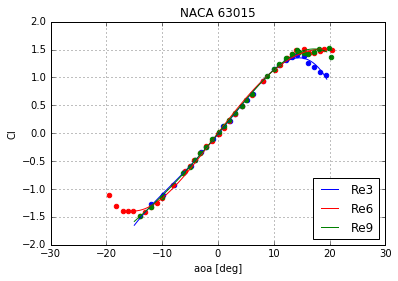

In [8]:
aoa = np.arange(start=-15,stop=20,step=0.5)
cl_re3 = np.array([helicopter.rotor.blade.airfoil.cl_aoa(alpha, reynold=3e6) for alpha in aoa])
cl_re6 = np.array([helicopter.rotor.blade.airfoil.cl_aoa(alpha, reynold=6e6) for alpha in aoa])
cl_re9 = np.array([helicopter.rotor.blade.airfoil.cl_aoa(alpha, reynold=9e6) for alpha in aoa])
plt.plot(aoa,cl_re3,color='b',label='Re3')
plt.plot(aoa,cl_re6,color='r', label='Re6')
plt.plot(aoa,cl_re9, color='g', label='Re9')
plt.scatter(*zip(*helicopter.rotor.blade.airfoil.AIRFOIL_DATA['Re3']['AoA_Cl']), color='b')
plt.scatter(*zip(*helicopter.rotor.blade.airfoil.AIRFOIL_DATA['Re6']['AoA_Cl']), color='r')
plt.scatter(*zip(*helicopter.rotor.blade.airfoil.AIRFOIL_DATA['Re9']['AoA_Cl']), color='g')
plt.legend(loc=4); plt.grid(); plt.title('NACA 63015'); plt.ylabel('Cl'); plt.xlabel('aoa [deg]')

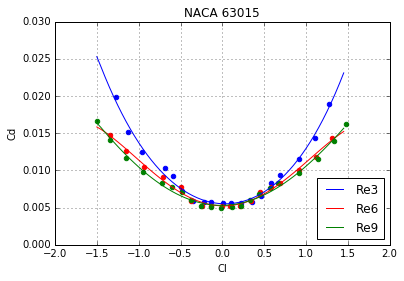

In [9]:
cl_list = np.arange(start=-1.5,stop=1.5,step=0.05)
cd_re3 = np.array([helicopter.rotor.blade.airfoil.cd_cl(cl, reynold=3e6) for cl in cl_list])
cd_re6 = np.array([helicopter.rotor.blade.airfoil.cd_cl(cl, reynold=6e6) for cl in cl_list])
cd_re9 = np.array([helicopter.rotor.blade.airfoil.cd_cl(cl, reynold=9e6) for cl in cl_list])
plt.plot(cl_list,cd_re3,color='b',label='Re3')
plt.plot(cl_list,cd_re6,color='r', label='Re6')
plt.plot(cl_list,cd_re9, color='g', label='Re9')
plt.scatter(*zip(*helicopter.rotor.blade.airfoil.AIRFOIL_DATA['Re3']['Cl_Cd']), color='b')
plt.scatter(*zip(*helicopter.rotor.blade.airfoil.AIRFOIL_DATA['Re6']['Cl_Cd']), color='r')
plt.scatter(*zip(*helicopter.rotor.blade.airfoil.AIRFOIL_DATA['Re9']['Cl_Cd']), color='g')
plt.legend(loc=4); plt.grid(); plt.title('NACA 63015'); plt.ylabel('Cd'); plt.xlabel('Cl')

### Rotor de cola: NACA 63415

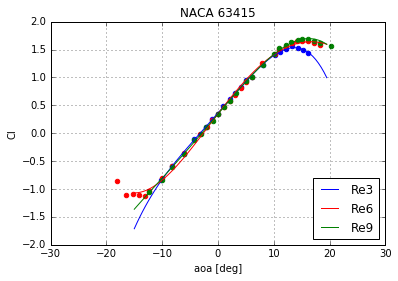

In [10]:
aoa = np.arange(start=-15,stop=20,step=0.5)
cl_re3 = np.array([helicopter.tail_rotor.blade.airfoil.cl_aoa(alpha, reynold=3e6) for alpha in aoa])
cl_re6 = np.array([helicopter.tail_rotor.blade.airfoil.cl_aoa(alpha, reynold=6e6) for alpha in aoa])
cl_re9 = np.array([helicopter.tail_rotor.blade.airfoil.cl_aoa(alpha, reynold=9e6) for alpha in aoa])
plt.plot(aoa,cl_re3,color='b',label='Re3')
plt.plot(aoa,cl_re6,color='r', label='Re6')
plt.plot(aoa,cl_re9, color='g', label='Re9')
plt.scatter(*zip(*helicopter.tail_rotor.blade.airfoil.AIRFOIL_DATA['Re3']['AoA_Cl']), color='b')
plt.scatter(*zip(*helicopter.tail_rotor.blade.airfoil.AIRFOIL_DATA['Re6']['AoA_Cl']), color='r')
plt.scatter(*zip(*helicopter.tail_rotor.blade.airfoil.AIRFOIL_DATA['Re9']['AoA_Cl']), color='g')
plt.legend(loc=4); plt.grid(); plt.title('NACA 63415'); plt.ylabel('Cl'); plt.xlabel('aoa [deg]')

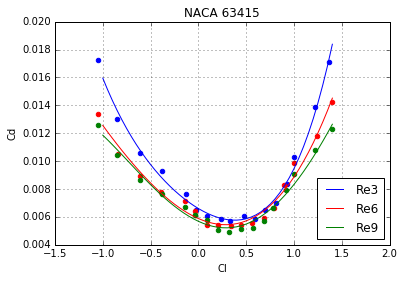

In [11]:
cl_list = np.arange(start=-1.0,stop=1.45,step=0.05)
cd_re3 = np.array([helicopter.tail_rotor.blade.airfoil.cd_cl(cl, reynold=3e6) for cl in cl_list])
cd_re6 = np.array([helicopter.tail_rotor.blade.airfoil.cd_cl(cl, reynold=6e6) for cl in cl_list])
cd_re9 = np.array([helicopter.tail_rotor.blade.airfoil.cd_cl(cl, reynold=9e6) for cl in cl_list])
plt.plot(cl_list,cd_re3,color='b',label='Re3')
plt.plot(cl_list,cd_re6,color='r', label='Re6')
plt.plot(cl_list,cd_re9, color='g', label='Re9')
plt.scatter(*zip(*helicopter.tail_rotor.blade.airfoil.AIRFOIL_DATA['Re3']['Cl_Cd']), color='b')
plt.scatter(*zip(*helicopter.tail_rotor.blade.airfoil.AIRFOIL_DATA['Re6']['Cl_Cd']), color='r')
plt.scatter(*zip(*helicopter.tail_rotor.blade.airfoil.AIRFOIL_DATA['Re9']['Cl_Cd']), color='g')
plt.legend(loc=4); plt.grid(); plt.title('NACA 63415'); plt.ylabel('Cd'); plt.xlabel('Cl')

## Angulo local en función de theta

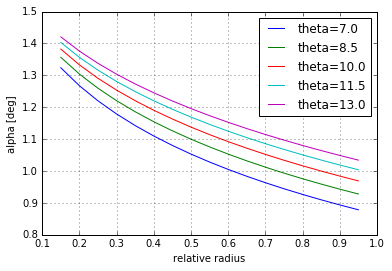

In [12]:
theta_list = np.arange(start=7.0, stop=14.5, step=1.5)
relative_radius = np.arange(start=helicopter.rotor.blade.x0,stop=1.0,step=0.05)
alpha_local = [[helicopter.rotor.local_angle(r, theta, height[0]) 
                for r in relative_radius] for theta in theta_list]
[plt.plot(relative_radius, alpha, label="theta={}".format(theta)) for alpha,theta
 in zip(alpha_local, theta_list)]
plt.legend(loc=1); plt.grid(); plt.ylabel('alpha [deg]'); plt.xlabel('relative radius')

## Cl local en función de theta

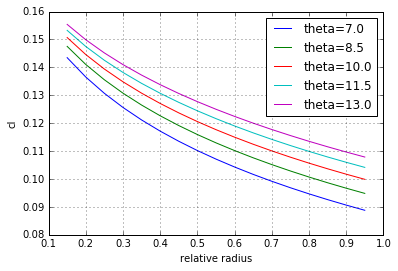

In [13]:
cl_local = [[helicopter.rotor.local_cl(r, theta, height[0]) 
                for r in relative_radius] for theta in theta_list]
[plt.plot(relative_radius, cl, label="theta={}".format(theta)) for cl,theta
 in zip(cl_local, theta_list)]
plt.legend(loc=1); plt.grid(); plt.ylabel('cl'); plt.xlabel('relative radius')

## Cd local en función de theta

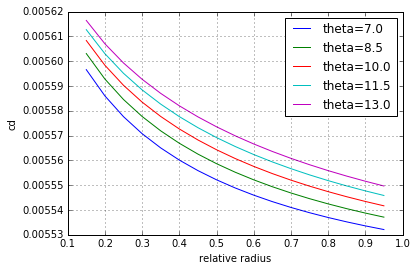

In [14]:
cd_local = [[helicopter.rotor.local_cd(r, theta, height[0]) 
                for r in relative_radius] for theta in theta_list]
[plt.plot(relative_radius, cd, label="theta={}".format(theta)) for cd,theta
 in zip(cd_local, theta_list)]
plt.legend(loc=1); plt.grid(); plt.ylabel('cd'); plt.xlabel('relative radius')